In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN,KMeans
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
df.nunique()

ID#                  3999
Balance              3904
Qual_miles            164
cc1_miles               5
cc2_miles               3
cc3_miles               5
Bonus_miles          2734
Bonus_trans            57
Flight_miles_12mo     343
Flight_trans_12        35
Days_since_enroll    2820
Award?                  2
dtype: int64

In [4]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [5]:
df.duplicated().sum()

0

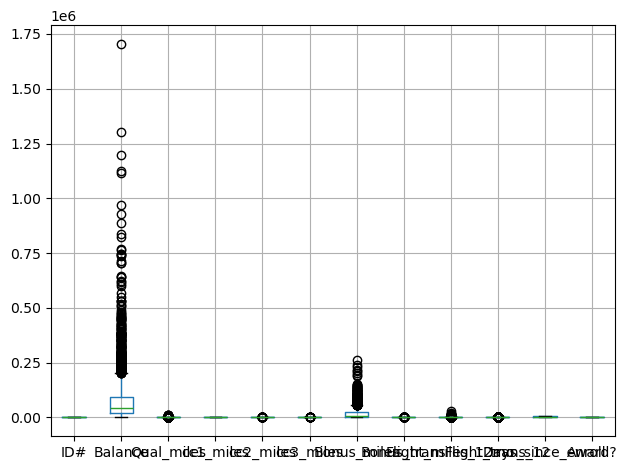

In [6]:
df.boxplot()
plt.tight_layout()
plt.show()

In [7]:
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_extreme=Q1-(1.5*IQR)
    upper_extreme=Q3+(1.5*IQR)
    df[column]=df[column].apply(lambda x:lower_extreme if x<lower_extreme else upper_extreme if x> upper_extreme else x)
for col in df.select_dtypes(['int','float']):
    outlier_capping(df,col)

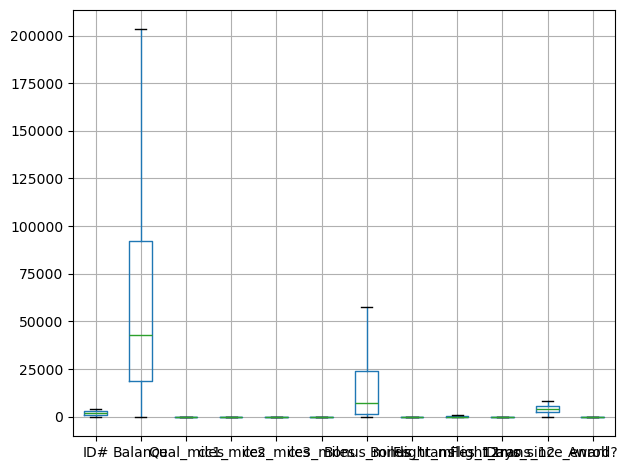

In [8]:
df.boxplot()
plt.tight_layout()
plt.show()

In [9]:
target=df[['Award?']]
features=df.drop(columns='Award?')

In [10]:
features.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,1,28143.0,0.0,1,1.0,1.0,174.0,1.0,0.0,0.0,7000
1,2,19244.0,0.0,1,1.0,1.0,215.0,2.0,0.0,0.0,6968
2,3,41354.0,0.0,1,1.0,1.0,4123.0,4.0,0.0,0.0,7034
3,4,14776.0,0.0,1,1.0,1.0,500.0,1.0,0.0,0.0,6952
4,5,97752.0,0.0,4,1.0,1.0,43300.0,26.0,777.5,2.5,6935


In [11]:
min=MinMaxScaler()

In [12]:
feature=pd.DataFrame(min.fit_transform(features),columns=features.columns)
feature.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.000000,0.138486,0.0,0.00,0.0,0.0,0.003019,0.026316,0.0,0.0,0.843742
1,0.000249,0.094696,0.0,0.00,0.0,0.0,0.003731,0.052632,0.0,0.0,0.839884
2,0.000498,0.203495,0.0,0.00,0.0,0.0,0.071547,0.105263,0.0,0.0,0.847842
3,0.000746,0.072710,0.0,0.00,0.0,0.0,0.008677,0.026316,0.0,0.0,0.837955
4,0.000995,0.481019,0.0,0.75,0.0,0.0,0.751394,0.684211,1.0,1.0,0.835905


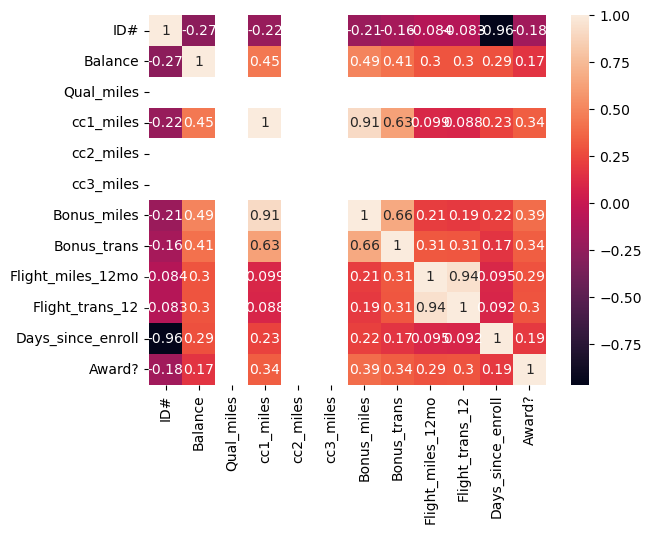

In [13]:
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [14]:
f_reg=f_classif(feature,target)

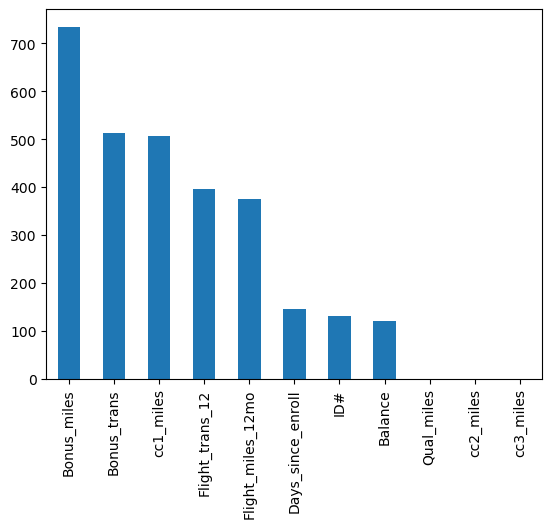

In [15]:
pd.Series(f_reg[0],index=feature.columns).sort_values(ascending=False).plot(kind='bar')
plt.show()

In [16]:
feature=feature.drop(columns=['Qual_miles','cc2_miles','cc3_miles'])
feature.head()

,ID#,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.000000,0.138486,0.00,0.003019,0.026316,0.0,0.0,0.843742
1,0.000249,0.094696,0.00,0.003731,0.052632,0.0,0.0,0.839884
2,0.000498,0.203495,0.00,0.071547,0.105263,0.0,0.0,0.847842
3,0.000746,0.072710,0.00,0.008677,0.026316,0.0,0.0,0.837955
4,0.000995,0.481019,0.75,0.751394,0.684211,1.0,1.0,0.835905


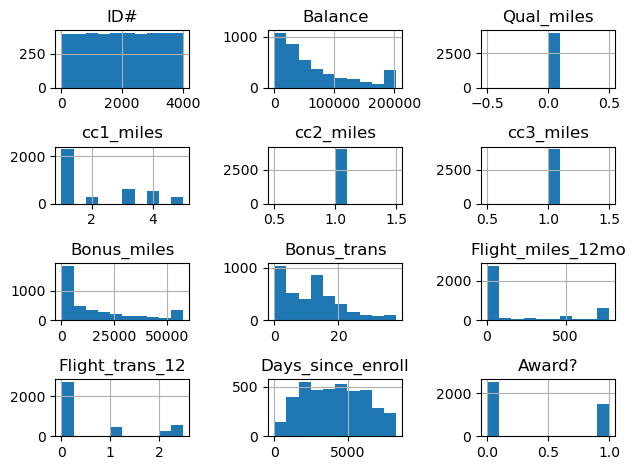

In [17]:
df.hist()
plt.tight_layout()
plt.show()

In [38]:
inertia = []
K_range = range(1, 11) 
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(feature)
    inertia.append(kmeans.inertia_)

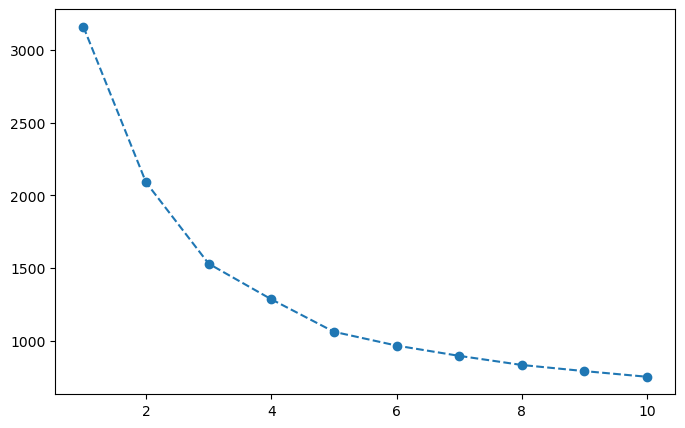

In [41]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.show()

In [ ]:
##cluster 2 by elbow method

In [18]:
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(feature)
    score = silhouette_score(feature, labels)
    print(f'Clusters: {i}, Silhouette Score: {score}')

Clusters: 2, Silhouette Score: 0.3907279681478401
Clusters: 3, Silhouette Score: 0.3458007992194574
Clusters: 4, Silhouette Score: 0.3438564125777995
Clusters: 5, Silhouette Score: 0.3288332435018441
Clusters: 6, Silhouette Score: 0.29405772360121474
Clusters: 7, Silhouette Score: 0.2920042636953561
Clusters: 8, Silhouette Score: 0.286279050775653
Clusters: 9, Silhouette Score: 0.2851120717434086
Clusters: 10, Silhouette Score: 0.28859470401349446


In [19]:
## highest score 0.39 for cluster 2

In [20]:
kmean = KMeans(n_clusters=2, random_state=42)

In [21]:
label = kmean.fit_predict(feature)

In [22]:
kmeans.cluster_centers_

array([[2.62494865e-01, 2.49424269e-01, 6.65137615e-02, 1.28458675e-01,
        2.92974408e-01, 8.59987020e-01, 8.63302752e-01, 7.00177867e-01],
       [7.94441721e-01, 1.36579658e-01, 1.72139831e-02, 5.16848600e-02,
        1.50897636e-01, 7.94321216e-04, 3.38983051e-03, 2.42910691e-01],
       [2.15506023e-01, 4.86740701e-01, 3.76315789e-01, 2.60370148e-01,
        3.79916898e-01, 2.72838044e-02, 4.52631579e-02, 7.43201807e-01],
       [7.90478641e-01, 2.81527031e-01, 7.38916256e-02, 1.55181849e-01,
        2.90899663e-01, 9.42667068e-01, 9.33004926e-01, 2.64401472e-01],
       [3.15531716e-01, 8.74464401e-01, 1.18055556e-01, 2.49049551e-01,
        4.42982456e-01, 9.14500715e-01, 8.90277778e-01, 6.58603609e-01],
       [2.90146323e-01, 1.41746393e-01, 1.53949130e-02, 5.02630058e-02,
        1.39822448e-01, 7.48287900e-03, 1.55287818e-02, 6.70352820e-01],
       [3.25358695e-01, 5.69487307e-01, 8.50923483e-01, 8.30067491e-01,
        4.83127343e-01, 2.78750138e-02, 4.64379947e-02, 6.

In [23]:
kmeans.inertia_

767.5790448006594

In [24]:
silhouette_score(feature, label)

0.3907279681478401

In [25]:
df['Cluster'] = label

In [26]:
cluster_size = df['Cluster'].value_counts().rename_axis('Cluster').to_frame('Size')

In [27]:
cluster_means = df.groupby('Cluster').mean()

In [28]:
cluster_medians = df.groupby('Cluster').median()

In [29]:
print("--- Cluster Sizes ---")
print(cluster_size)
print("\n" + "-"*30 + "\n")

print("--- Cluster Means (Feature Profiling) ---")
print(cluster_means)
print("\n" + "-"*30 + "\n")

print("--- Cluster Medians (Robust Central Tendency) ---")
print(cluster_medians)

--- Cluster Sizes ---
         Size
Cluster      
1        2961
0        1038

------------------------------

--- Cluster Means (Feature Profiling) ---
                 ID#       Balance  Qual_miles  cc1_miles  cc2_miles  \
Cluster                                                                
0        1797.305395  96808.951349         0.0   2.426782        1.0   
1        2091.070584  52186.113813         0.0   1.930767        1.0   

         cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Cluster                                                            
0              1.0  23257.469171    16.486513         637.514933   
1              1.0  12659.999662     9.712259          16.988855   

         Flight_trans_12  Days_since_enroll    Award?  
Cluster                                                
0               2.040944        4539.086705  0.613680  
1               0.083418        3971.140493  0.285039  

------------------------------

--- Cluster Medians (Robust 

In [30]:
cluster_means_transposed = cluster_means.T

In [31]:
eps=[0.1,0.2,0.3,0.4,0.5]


In [32]:

max=0
for i in eps:
    for j in range(1,11):
        dbscan=DBSCAN(eps=i,min_samples=j)
        lab=dbscan.fit_predict(feature)
        score=silhouette_score(feature,lab)
        if (score>max):
            max=score
        print(f"eps={i}, min_samples={j}, silhouette={score:.3f}")
print(max)

eps=0.1, min_samples=1, silhouette=-0.158
eps=0.1, min_samples=2, silhouette=-0.379
eps=0.1, min_samples=3, silhouette=-0.425
eps=0.1, min_samples=4, silhouette=-0.430
eps=0.1, min_samples=5, silhouette=-0.389
eps=0.1, min_samples=6, silhouette=-0.387
eps=0.1, min_samples=7, silhouette=-0.372
eps=0.1, min_samples=8, silhouette=-0.265
eps=0.1, min_samples=9, silhouette=-0.195
eps=0.1, min_samples=10, silhouette=-0.130
eps=0.2, min_samples=1, silhouette=-0.213
eps=0.2, min_samples=2, silhouette=-0.178
eps=0.2, min_samples=3, silhouette=-0.158
eps=0.2, min_samples=4, silhouette=-0.139
eps=0.2, min_samples=5, silhouette=-0.120
eps=0.2, min_samples=6, silhouette=-0.103
eps=0.2, min_samples=7, silhouette=-0.094
eps=0.2, min_samples=8, silhouette=-0.125
eps=0.2, min_samples=9, silhouette=-0.109
eps=0.2, min_samples=10, silhouette=-0.080
eps=0.3, min_samples=1, silhouette=-0.320
eps=0.3, min_samples=2, silhouette=-0.184
eps=0.3, min_samples=3, silhouette=-0.053
eps=0.3, min_samples=4, silhouet

In [33]:
dbscann=DBSCAN(eps=0.5,min_samples=3)
labs=dbscann.fit_predict(feature)
silhouette_score(feature,labs)

0.2913273028201792

In [34]:
feat=pd.DataFrame(labs)

In [35]:
feat.head()

,0
0,0
1,0
2,0
3,0
4,0


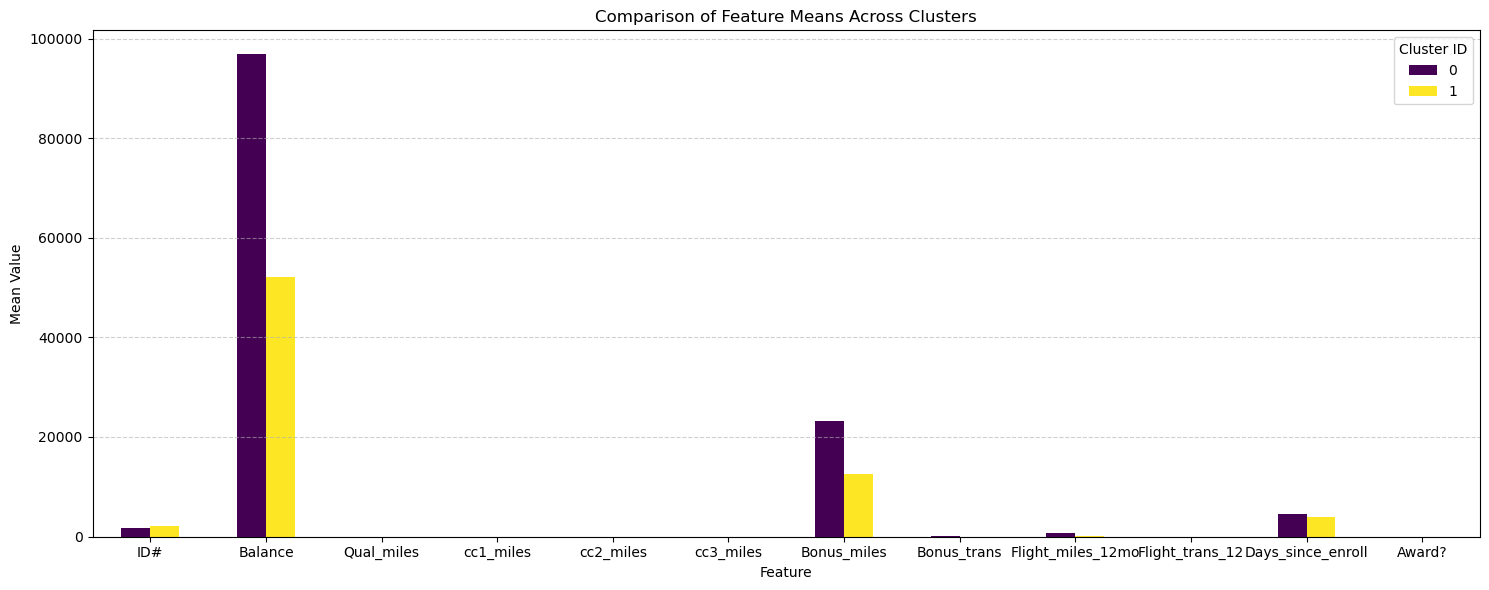

In [36]:
fig, ax = plt.subplots(figsize=(15, 6))
cluster_means_transposed.plot(kind='bar', ax=ax, colormap='viridis')
plt.title('Comparison of Feature Means Across Clusters')
plt.xlabel('Feature')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(title='Cluster ID')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

The clusters are almost exclusively defined by the sheer magnitude of the Balance and Bonus_miles features.

Cluster 0 :
Balance: This is the single most distinguishing feature. Cluster 0 has an average balance of nearly 100,000 miles, which is almost double the balance of Cluster 1 (approx. 52,000 miles).

Bonus Miles: Cluster 0 has significantly higher accumulated bonus miles (approx. 23,000) compared to Cluster 1 (approx. 12,000).

Award: The proportion of customers who have earned an award flight is visibly higher in Cluster 0 (though the difference is small in absolute value).

Cluster 1:
Balance: Cluster 1 has a significantly lower average balance than Cluster 0, indicating less accumulated value.

Bonus Miles: They have lower average bonus miles, correlating with their lower overall balance.

Qual_miles, cc1_miles, cc2_miles, cc3_miles: Both clusters show extremely low, near-zero values for these features (likely related to qualification miles or specific credit card tiers). These features are not useful for distinguishing the clusters.

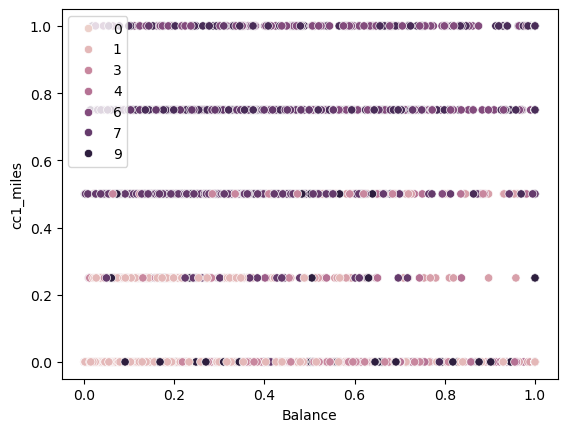

In [37]:
sns.scatterplot(data=feature,x='Balance',y='cc1_miles',hue=labels)
plt.show()

Indifferent Clustering. Data points are on or very close to the decision boundary between two neighboring clusters since the silhoutte score is near to 0